In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:

# Load dataset
df = pd.read_csv("Inventory.csv")

# Convert date columns
df['OrderDate'] = pd.to_datetime(df['OrderDate'], errors='coerce')


<ipython-input-5-991f79fcbb26>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['OrderDate'] = pd.to_datetime(df['OrderDate'], errors='coerce')


In [6]:

# Check missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

# Summary statistics
print(df.describe())


Missing Values:
 Series([], dtype: int64)
       EmployeePhone  ProductStandardCost       Profit  ProductListPrice  \
count   4.000000e+02           400.000000   400.000000        400.000000   
mean    1.300551e+12          1812.654525   189.743700       2002.398800   
min     1.856490e+07            12.630000     0.000000         15.550000   
25%     9.716165e+08           414.160000    59.972500        502.982500   
50%     1.168870e+10           698.320000   134.200000        849.990000   
75%     2.651186e+10          1671.950000   229.520000       1999.890000   
max     1.144164e+13         75410.000000  2770.000000      78180.000000   
std     3.546655e+12          4297.988742   254.318871       4432.591249   

       CustomerCreditLimit  CustomerPhone            OrderDate  \
count           400.000000   4.000000e+02                  400   
mean           2033.617500   6.422348e+10  2016-10-01 00:39:36   
min             100.000000   4.538500e+04  2013-06-21 00:00:00   
25%      

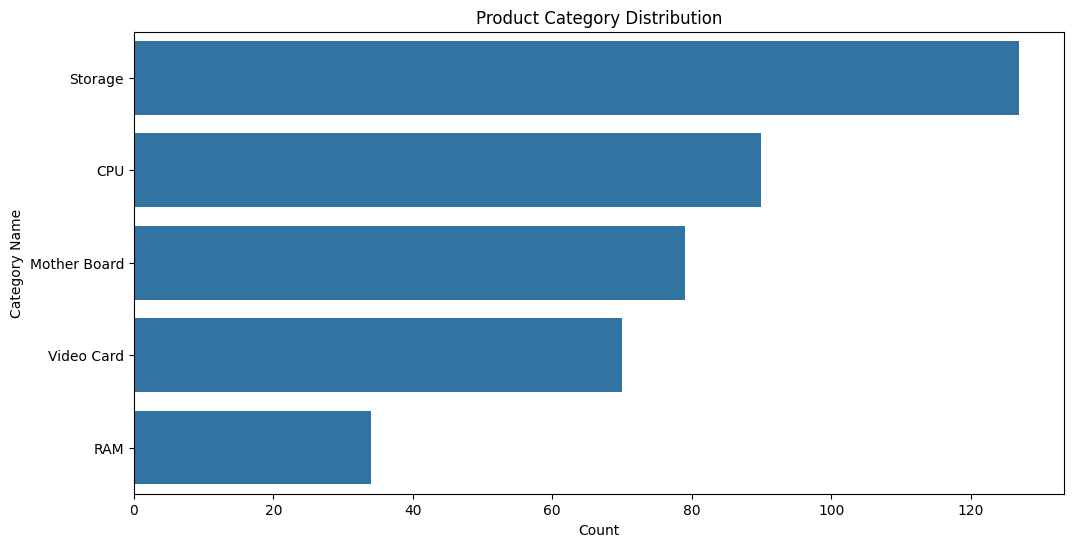

In [7]:

# Product category distribution
plt.figure(figsize=(12, 6))
sns.countplot(y=df['CategoryName'], order=df['CategoryName'].value_counts().index)
plt.title("Product Category Distribution")
plt.xlabel("Count")
plt.ylabel("Category Name")
plt.show()


<ipython-input-8-b023a98116ac>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Status'], palette='coolwarm')


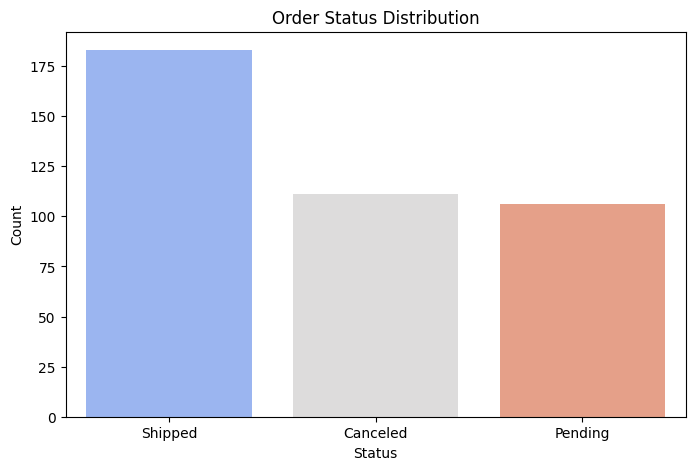

In [8]:

# Order status distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=df['Status'], palette='coolwarm')
plt.title("Order Status Distribution")
plt.xlabel("Status")
plt.ylabel("Count")
plt.show()


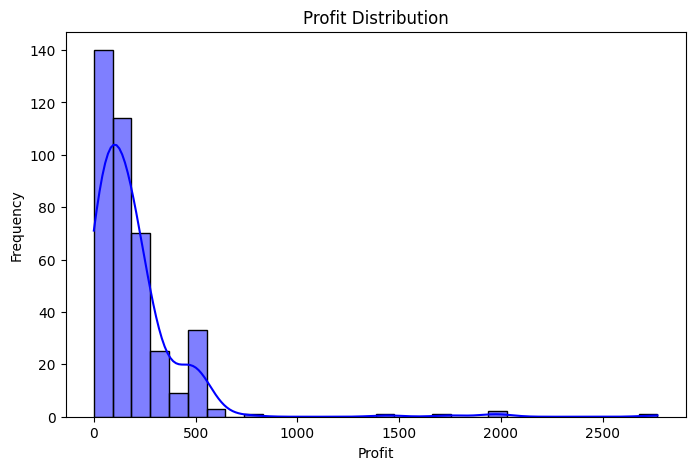

In [9]:

# Profit distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Profit'], bins=30, kde=True, color='blue')
plt.title("Profit Distribution")
plt.xlabel("Profit")
plt.ylabel("Frequency")
plt.show()


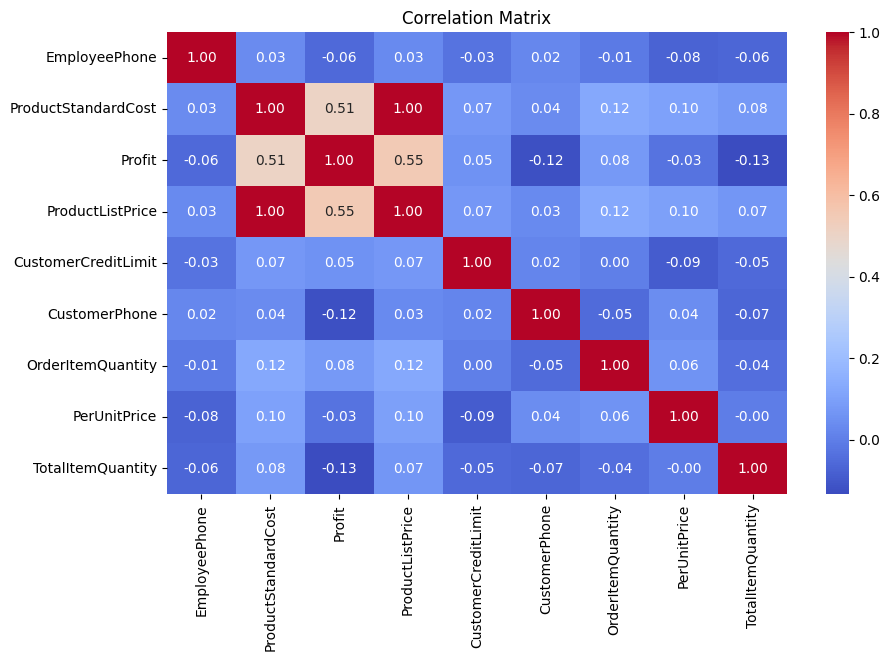

In [10]:

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

# Insights:
# 1. The majority of orders fall into specific categories.
# 2. Profit distribution is skewed, indicating variability in product profitability.
# 3. Order status has clear distributions between 'Shipped', 'Pending', and 'Canceled'.
# 4. The correlation heatmap shows relationships between price, quantity, and profit.
